In [1]:
pip install smote_variants

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 134 kB 5.1 MB/s 
  Created wheel for minisom: filename=MiniSom-2.3.0-py3-none-any.whl size=9018 sha256=0c24363c2c3d03f6a4a3bd221c52b6208f101d0fbea55ca29af6ee277b3453c1
  Stored in directory: /root/.cache/pip/wheels/d4/ca/4a/488772b0399fec45ff53132ed14c948dec4b30deee3a532f80
  Created wheel for statistics: filename=statistics-1.0.3.5-py3-none-any.whl size=7454 sha256=5d95ad5056d4a818de770d4bd13dc5384c9a76c11791116b7aa5f31bc8e5856e
  Stored in directory: /root/.cache/pip/wheels/37/09/e1/49ee45c0ce248a6e9c986aae82d32bbcba09c9f3b9d0c3406a
Successfully built minisom statistics


In [2]:
pip install imbalanced_databases

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.3 MB 5.2 MB/s 


In [3]:
pip install imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import smote_variants as sv
import pandas  as pd
import matplotlib.pyplot as plt
import numpy as np
import imbalanced_databases as imbd
from sklearn import metrics
from sklearn.datasets import load_wine
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import plot_roc_curve
from imblearn.over_sampling import SMOTE

%matplotlib inline
from sklearn.model_selection import train_test_split

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
df_train = pd.read_csv('/content/drive/My Drive/ml_dataset.csv')

In [7]:
df = df_train.copy()
df.drop(['Unnamed: 0'],inplace=True,axis=1)

In [8]:
df.columns

Index(['pkts', 'bytes', 'dur', 'average_dur', 'stddev_dur', 'total_dur',
       'min_dur', 'max_dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate',
       'srate', 'drate', 'TnBPSrcIP', 'TnBPDstIP', 'TnP_PSrcIP', 'TnP_PDstIP',
       'TnP_PerProto', 'TnP_Per_Dport', 'AR_P_Proto_P_SrcIP',
       'AR_P_Proto_P_DstIP', 'N_IN_Conn_P_DstIP', 'N_IN_Conn_P_SrcIP',
       'AR_P_Proto_P_Sport', 'AR_P_Proto_P_Dport',
       'Pkts_P_State_P_Protocol_P_DestIP', 'Pkts_P_State_P_Protocol_P_SrcIP',
       'attack'],
      dtype='object')

In [9]:
df.drop([ 'TnBPSrcIP', 'TnBPDstIP', 'TnP_PSrcIP', 'TnP_PDstIP',
       'TnP_PerProto', 'TnP_Per_Dport', 'AR_P_Proto_P_SrcIP',
       'AR_P_Proto_P_DstIP', 'N_IN_Conn_P_DstIP', 'N_IN_Conn_P_SrcIP',
       'AR_P_Proto_P_Sport', 'AR_P_Proto_P_Dport',
       'Pkts_P_State_P_Protocol_P_DestIP', 'Pkts_P_State_P_Protocol_P_SrcIP'],axis=1,inplace=True)

In [10]:
df.head()

,pkts,bytes,dur,average_dur,stddev_dur,total_dur,min_dur,max_dur,spkts,dpkts,sbytes,dbytes,rate,srate,drate,attack
0,10,1729,6.406424,0.679473,0.544126,1.358946,0.135347,1.223599,6,4,963,766,1.404840,0.780467,0.468280,1
1,10,1604,6.405851,0.679572,0.544197,1.359144,0.135375,1.223769,6,4,838,766,1.404966,0.780536,0.468322,1
2,8,1708,6.401038,1.110847,1.110847,2.221694,0.000000,2.221694,5,3,1008,700,1.093573,0.624899,0.900214,1
3,8,1462,6.400703,1.113328,1.113328,2.226655,0.000000,2.226655,5,3,762,700,1.093630,0.624931,0.898208,1
4,8,1296,6.400472,1.113098,1.113098,2.226195,0.000000,2.226195,5,3,596,700,1.093669,0.624954,0.898394,1


1    1926608
0        477
Name: attack, dtype: int64

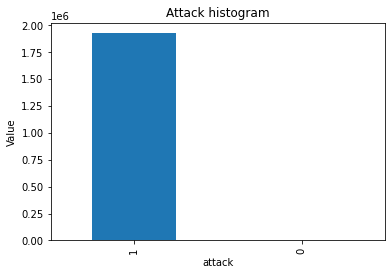

In [11]:
pd.value_counts(df['attack']).plot.bar()
plt.title('Attack histogram')
plt.xlabel('attack')
plt.ylabel('Value')
df['attack'].value_counts()

In [12]:

def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
    

def classif_results(): 
  conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
  print('Confusion matrix:\n', conf_mat)

  labels = ['Class 0', 'Class 1']
  fig = plt.figure()
  ax = fig.add_subplot(111)
  cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
  fig.colorbar(cax)
  ax.set_xticklabels([''] + labels)
  ax.set_yticklabels([''] + labels)
  plt.xlabel('Predicted')
  plt.ylabel('Expected')
  plt.show()

  print("Accuracy", metrics.accuracy_score(y_test, y_pred))

  from sklearn.metrics import classification_report
  print(classification_report(y_test, y_pred))


  auc = roc_auc_score(y_test, y_pred)
  print("AUC Score: ")
  print(auc)

  fpr, tpr, thresholds = roc_curve(y_test, y_pred)
  plot_roc_curve(fpr, tpr)


In [13]:
X = df.iloc[:, df.columns != 'attack']
y = df.iloc[:, df.columns == 'attack']

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 0)

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [15]:
X_train, y_train = SMOTE().fit_resample(X_train, y_train)

# Logistic Regression:


In [16]:
from sklearn.linear_model import LogisticRegression 
classifier = LogisticRegression()
classifier.fit(X_train,y_train)

y_pred = classifier.predict(X_test)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Confusion matrix:
 [[   195      1]
 [147213 623425]]


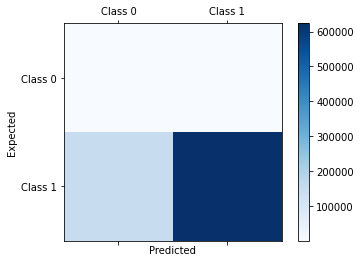

Accuracy 0.8090198408477052
              precision    recall  f1-score   support

           0       0.00      0.99      0.00       196
           1       1.00      0.81      0.89    770638

    accuracy                           0.81    770834
   macro avg       0.50      0.90      0.45    770834
weighted avg       1.00      0.81      0.89    770834

AUC Score: 
0.9019352623860929


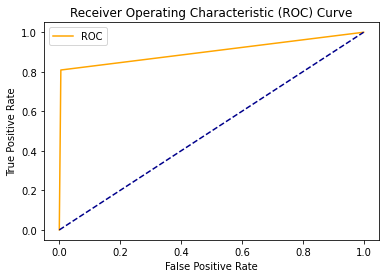

In [17]:
classif_results()

# Decision Trees

In [18]:

from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train,y_train)

y_pred = classifier.predict(X_test)



Confusion matrix:
 [[   196      0]
 [     1 770637]]


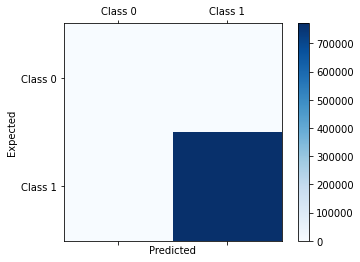

Accuracy 0.9999987027038247
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       196
           1       1.00      1.00      1.00    770638

    accuracy                           1.00    770834
   macro avg       1.00      1.00      1.00    770834
weighted avg       1.00      1.00      1.00    770834

AUC Score: 
0.9999993511869386


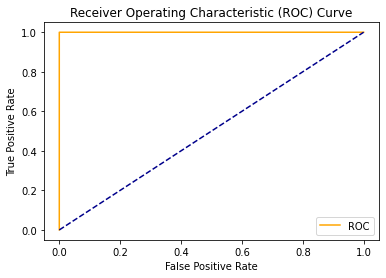

In [19]:
classif_results()

# Random Forest:

In [20]:

from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)


y_pred = classifier.predict(X_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Confusion matrix:
 [[   196      0]
 [     0 770638]]


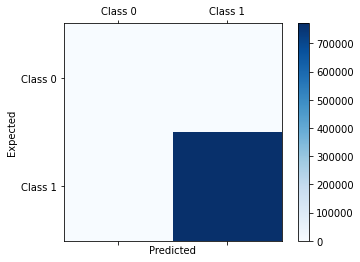

Accuracy 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       196
           1       1.00      1.00      1.00    770638

    accuracy                           1.00    770834
   macro avg       1.00      1.00      1.00    770834
weighted avg       1.00      1.00      1.00    770834

AUC Score: 
1.0


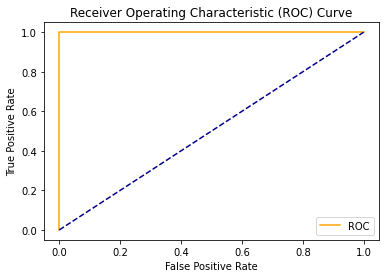

In [21]:
classif_results()

# KNN

In [ ]:


from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(X_train,y_train)

y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)

Confusion matrix:
 [[771554     20]
 [    23 769703]]


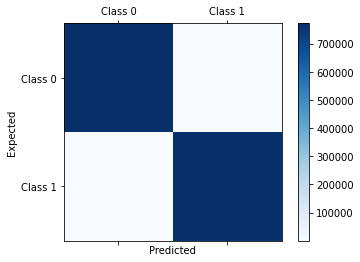

Accuracy 0.9999721014727827
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    771574
           1       1.00      1.00      1.00    769726

    accuracy                           1.00   1541300
   macro avg       1.00      1.00      1.00   1541300
weighted avg       1.00      1.00      1.00   1541300

AUC Score: 
0.9999720990989526


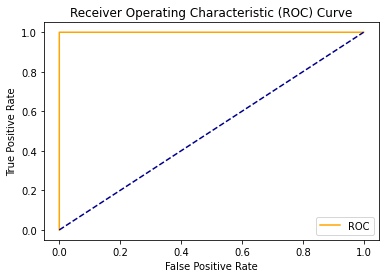

In [ ]:
classif_results()

# Support Vector Machines:

In [22]:

from sklearn.svm import SVC
from sklearn.svm import LinearSVC
classifier = LinearSVC()
classifier.fit(X_train, y_train)


y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Confusion matrix:
 [[   188      8]
 [ 68247 702391]]


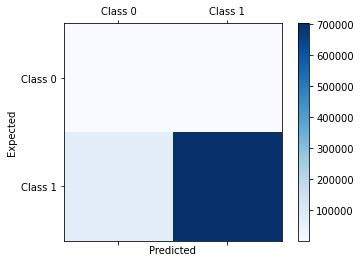

Accuracy 0.9114530495541193
              precision    recall  f1-score   support

           0       0.00      0.96      0.01       196
           1       1.00      0.91      0.95    770638

    accuracy                           0.91    770834
   macro avg       0.50      0.94      0.48    770834
weighted avg       1.00      0.91      0.95    770834

AUC Score: 
0.9353122917343175


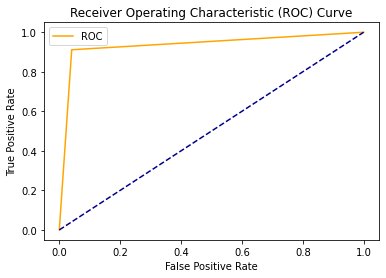

In [23]:
classif_results()

# Naive Bayes Classifier

In [24]:

from sklearn.naive_bayes import GaussianNB


classifier = GaussianNB()


classifier.fit(X_train, y_train)


y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Confusion matrix:
 [[    56    140]
 [   261 770377]]


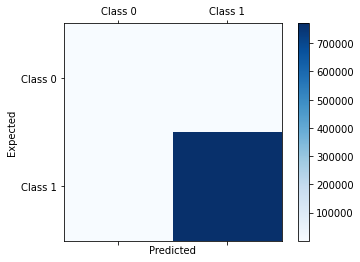

Accuracy 0.9994797842337001
              precision    recall  f1-score   support

           0       0.18      0.29      0.22       196
           1       1.00      1.00      1.00    770638

    accuracy                           1.00    770834
   macro avg       0.59      0.64      0.61    770834
weighted avg       1.00      1.00      1.00    770834

AUC Score: 
0.6426878026481213


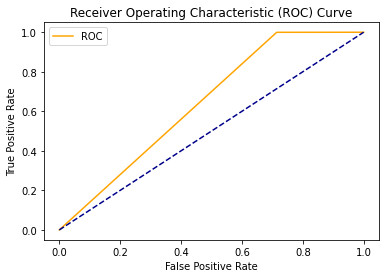

In [25]:
classif_results()

# Neural Network

In [26]:
import keras
from keras.models import Sequential
from keras.layers import Dense


classifier = Sequential()
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 15))
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


classifier.fit(X_train, y_train, batch_size = 10, epochs = 3)



y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)


from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)


Epoch 1/3
231194/231194 [==============================] - 300s 1ms/step - loss: 0.1059 - accuracy: 0.9714
Epoch 2/3
231194/231194 [==============================] - 306s 1ms/step - loss: 0.0914 - accuracy: 0.9766
Epoch 3/3
231194/231194 [==============================] - 309s 1ms/step - loss: 0.0857 - accuracy: 0.9777


Confusion matrix:
 [[   195      1]
 [ 33789 736849]]


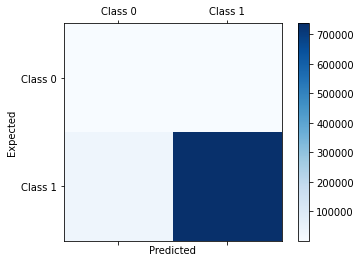

Accuracy 0.9561643622362272
              precision    recall  f1-score   support

           0       0.01      0.99      0.01       196
           1       1.00      0.96      0.98    770638

    accuracy                           0.96    770834
   macro avg       0.50      0.98      0.49    770834
weighted avg       1.00      0.96      0.98    770834

AUC Score: 
0.975526235060682


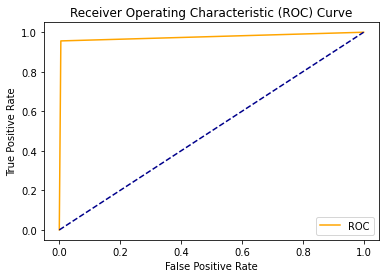

In [27]:
classif_results()